In [1]:
import sys
sys.path.append('/project2/alvinjin_1630/results')

from Trainer import Trainer

/project2/alvinjin_1630


In [2]:
import torch, jax
print("PyTorch sees:", torch.cuda.device_count(), "GPUs,", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "none")
print("JAX sees:", jax.devices())

PyTorch sees: 0 GPUs, none
JAX sees: [CpuDevice(id=0)]


['(30_15)x4_relu', '15x4_30x4_relu', '15x4_30x4_tanh', '18x8_relu', '18x8_tanh', '18x8_leaky', '24x8_relu', '24x8_tanh', '24x8_leaky', '30_15_30x6_relu', '30_15_30x6_tanh', '30_15_30x6_leaky', '30_25_20_15_10x4_relu', '30_25_20_15_10x4_tanh', '30_25_20_15_10x4_leaky', '30_28_26_24_22_20_18_16_relu', '30_28_26_24_22_20_18_16_tanh', '30_28_26_24_22_20_18_16_leaky', '30x4_10x4_relu', '30x4_10x4_tanh', '30x4_10x4_leaky', '30x4_12x4_relu', '30x4_12x4_tanh', '30x4_12x4_leaky', '30x4_18x4_relu', '30x4_18x4_tanh', '30x4_18x4_leaky', '30x4_24x4_relu', '30x4_24x4_tanh', '30x4_24x4_leaky', '30x8_relu', '30x8_tanh', '30x8_leaky']
Num models: 33

(30_15)x4_relu: 0.508, 0.074
15x4_30x4_relu: 0.543, 0.064
15x4_30x4_tanh: 0.329, 0.088
18x8_relu: 0.647, 0.092
18x8_tanh: 0.349, 0.032
18x8_leaky: 0.497, 0.052
24x8_relu: 0.450, 0.073
24x8_tanh: 0.320, 0.043
24x8_leaky: 0.463, 0.028
30_15_30x6_relu: 0.449, 0.051
30_15_30x6_tanh: 0.316, 0.032
30_15_30x6_leaky: 0.466, 0.037
30_25_20_15_10x4_relu: 0.800, 0.10

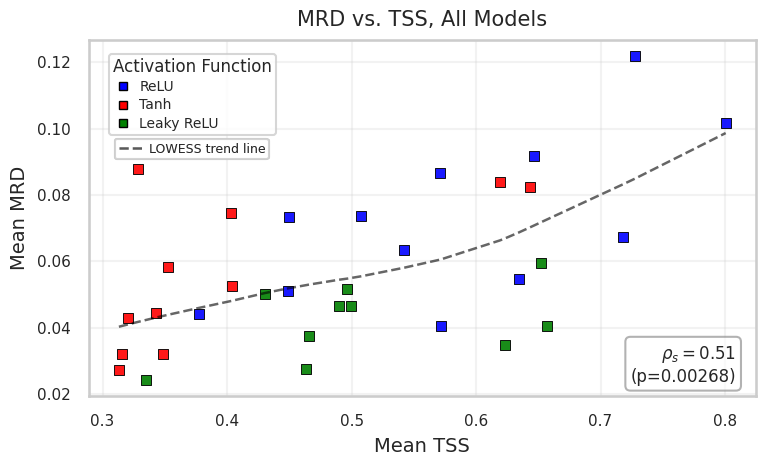

In [3]:
# data = Trainer.all_bootstrap_stats(
#     filename='all_8_layer_models',
#     B=5000,
#     use_mean=True,
#     save=True
# )

data = Trainer.get_bootstrap_data()

# Trainer.get_tsc(
#     data=data,
#     to_calculate=['30x8', '30x4_.*x4'],
#     title=r'TSS for 30x4 + $d$x4 ReLU',
#     legend=[r'$d=10$', r'$d=12$', r'$d=18$', r'$d=24$', r'$d=30$'],
#     # legend_title='Architecture',
#     plot=True,
#     figsize=(7.2, 4.5),
#     save=True,
#     filename='30x4_dx4_30x8_relu_vs_all_relu_8to5'
# )

# Trainer.get_tsc(
#     data=data,
#     to_calculate=['30x4_18x4'],
#     title=r'TSS for 30x4 + 18x4',
#     legend=['ReLU', 'Tanh', 'Leaky ReLU'],
#     legend_title='Activation Function',
#     plot=True,
#     figsize=(7.2, 4.5),
#     save=True,
#     filename='30x4_18x4_all_acts_vs_all_8to5'
# )

Trainer.plot_mrd_tss(
    data=data,
    add_d=False,
    print_all=True,
    print_outliers=True,
    title=f'MRD vs. TSS, All Models',
    figsize=(8, 5),
    s=50,
    save=False,
    filename='all_models_8to5_notitle'
)

# trainer_alt = Trainer(
#     dataset='D1',
#     hidden_dims=[30, 15, 30, 15, 30, 15, 30, 15],
#     act_fn=jax.nn.relu,
#     study_name='(30_15)x4_relu',
#     residual=False
# )

# trainer_184 = Trainer(
#     dataset='D1',
#     hidden_dims=[30] * 4 + [18] * 4,
#     act_fn=jax.nn.relu,
#     study_name='30x4_18x4_relu',
#     residual=False
# )

# trainer_184.graph_betti_numbers(title=r'$\beta_0$ for 30x4 + 18x4 ReLU', figsize=(7.2, 4.5), save=True, filename='30x4_18x4_relu_8to5')